# Projeto de People Analytics
## Análise de dados de Recursos Humanos

## Objetivos

- Empresa de Tecnologia sediada na cidade de São Paulo, que além de desenvolver Sistemas e Aplicativos, também promove treinamentos para o publico da Grande SP com a finalidade de atrair novos talentos para seu quadro de colaboradores.
- Essa empresa colheu dados históricos, de aproximadamente 19k alunos, para análise e verificar o motivo pelos quais muitos responderam que não estavam dispostos a trocar de emprego.
- Elaborar análise e explicar os possíveis motivos.

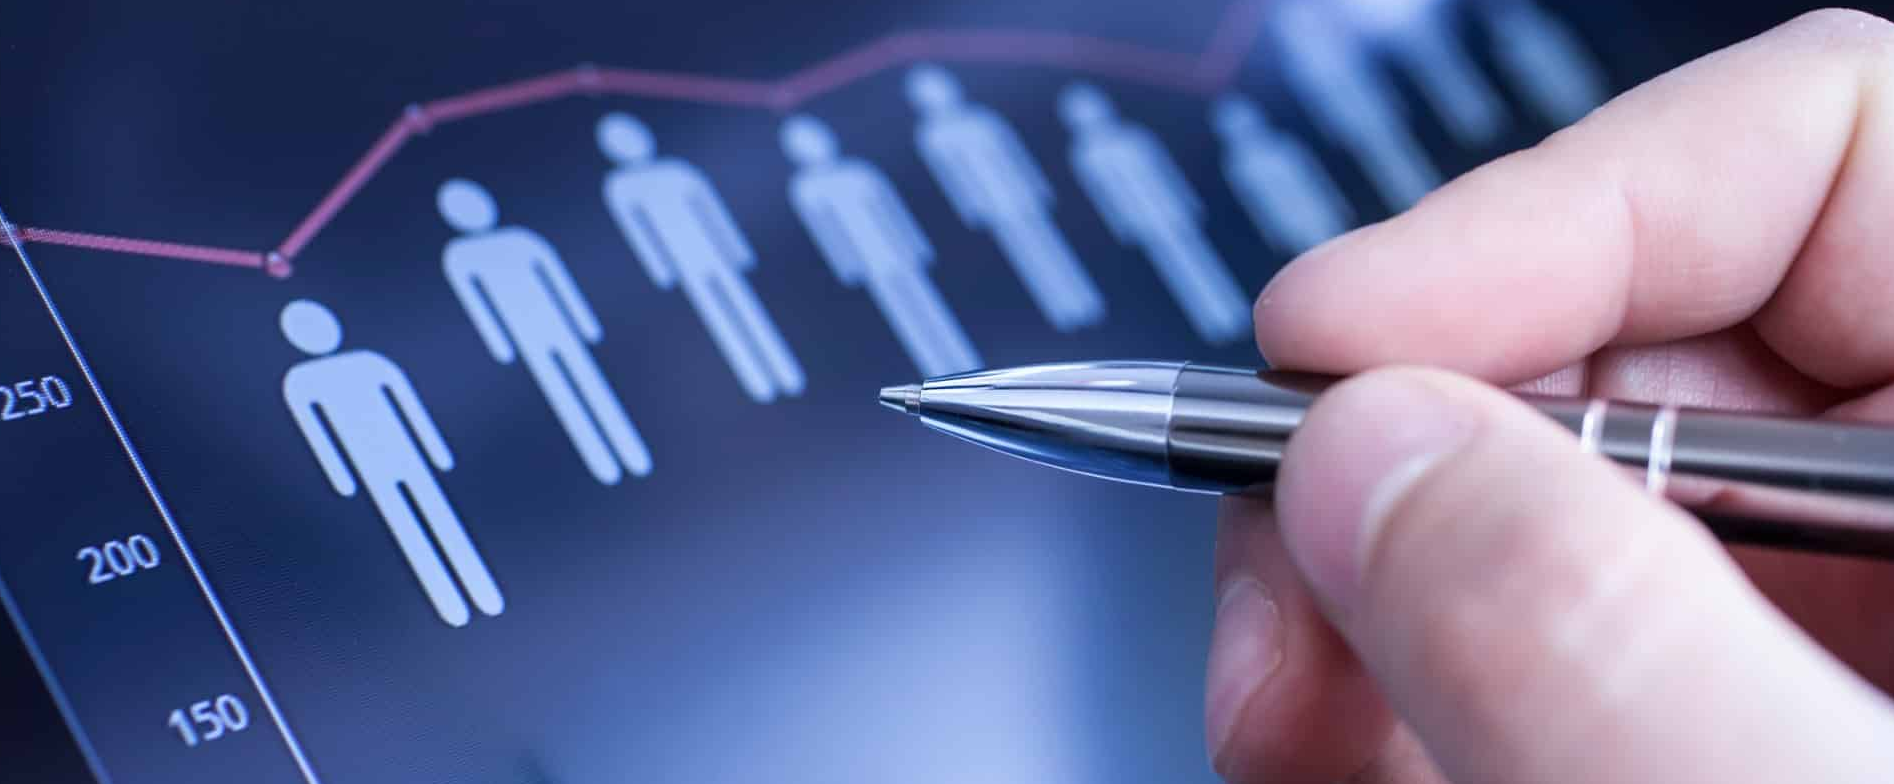

In [2]:
from IPython.display import Image
Image('rh.png')

## Instalando e carregando os pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instale o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [3]:
# pacote de vizualização de dados qua auxiliam identificar valores ausentes
# !pip install -q missingno

In [4]:
# O pacote Category Encoders em Python é uma biblioteca que fornece uma 
# série de técnicas para codificar variáveis categóricas em um formato numérico
# !pip install -q category_encoders

In [5]:
# Pacote de Visualização
# !pip install -q plotly

In [6]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Carregando os dados

In [7]:
### importar CSV
df = pd.read_csv('dataset/treinamento.csv', encoding='utf-8', sep=';')

In [8]:
df.shape

(19158, 14)

In [9]:
df.columns

Index(['id_candidato', 'cidade', 'idh_cidade', 'genero',
       'experiencia_relevante', 'matriculado_universidade', 'escolaridade',
       'atuacao', 'experiencia_anos', 'funcionarios_empresa', 'tipo_empresa',
       'dif_anos_novo_emprego', 'treinamento_horas', 'procura_emprego'],
      dtype='object')

In [10]:
df.head()

,id_candidato,cidade,idh_cidade,genero,experiencia_relevante,matriculado_universidade,escolaridade,atuacao,experiencia_anos,funcionarios_empresa,tipo_empresa,dif_anos_novo_emprego,treinamento_horas,procura_emprego
0,8949,São Paulo,0.805,Masculino,Com relevancia,Não matriculado,Superior,Exatas,>20,NaN,NaN,1,36,1.0
1,29725,Diadema,0.758,Masculino,Sem relevancia,Não matriculado,Superior,Exatas,15,50-99,Ltda,>4,47,0.0
2,11561,Osasco,0.769,NaN,Sem relevancia,Em tempo integral,Superior,Exatas,5,NaN,NaN,sem anterior,83,0.0
3,33241,Barueri,0.763,NaN,Sem relevancia,NaN,Superior,Negócios,<1,NaN,Ltda,sem anterior,52,1.0
4,666,Mauá,0.747,Masculino,Com relevancia,Não matriculado,Mestrado,Exatas,>20,50-99,Startup,4,8,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  int64  
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   atuacao                   16345 non-null  object 
 8   experiencia_anos          19093 non-null  object 
 9   funcionarios_empresa      13220 non-null  object 
 10  tipo_empresa              13018 non-null  object 
 11  dif_anos_novo_emprego     18735 non-null  object 
 12  treinamento_horas         19158 non-null  int64  
 13  procura_emprego           19158 non-null  float64
dtypes: flo

### Analisando a variável alvo

In [12]:
len(df)

19158

In [13]:
df['procura_emprego'].value_counts(dropna=False)

0.0    14381
1.0     4777
Name: procura_emprego, dtype: int64

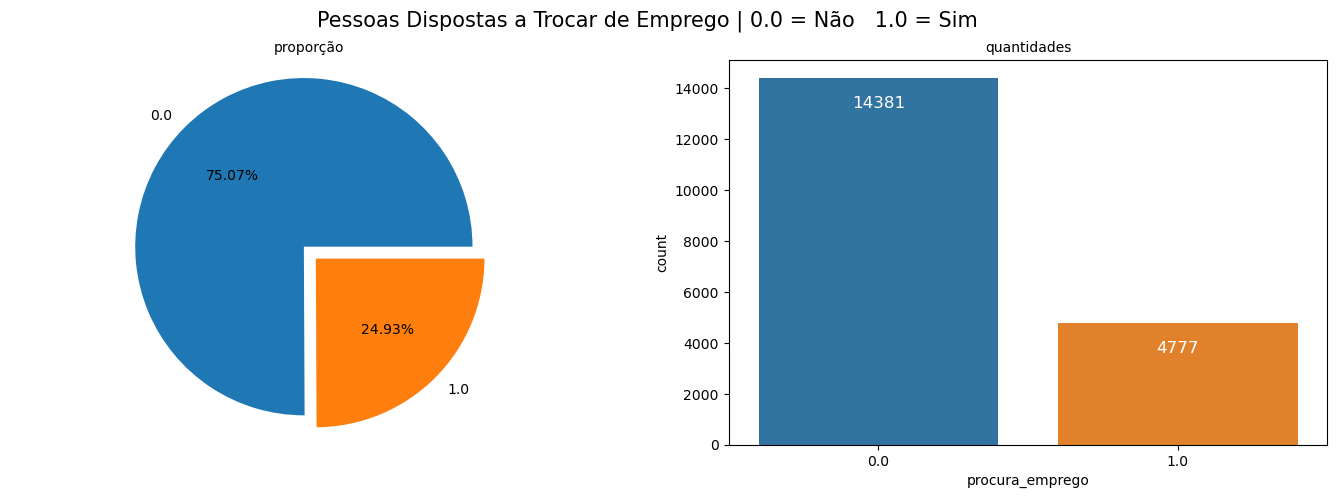

In [14]:
# Confirmar a quantidade de pessoas dispostas a trocar de emprego
# Figura
plt.figure(figsize = (17,5))

# Título principal
plt.suptitle('Pessoas Dispostas a Trocar de Emprego | 0.0 = Não   1.0 = Sim', fontsize = 15)

plt.subplot(121)

plt.pie(round(df['procura_emprego'].value_counts() / len(df) * 100, 2),
        labels = list(df['procura_emprego'].value_counts().index),
        autopct = "%.2f%%",
        explode = (0,0.1))

plt.axis("equal")
plt.title("proporção", size = 10)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'procura_emprego')
plt.title("quantidades", fontsize = 10)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', 
                (p.get_x()+0.4, 
                 p.get_height()), 
                ha = 'center', 
                va = 'top', 
                color = 'white', 
                size = 12)

## Análise exploratória de dados brutos

### Visualizando as variáveis categóricas

#### Tabelas de frequência
##### Não considerar as variáveis 'id_candidato', 'treinamento_horas' e 'procura_emprego'

In [15]:
# Criando tabelas de frequências
# iterando sobre as colunas categóricas do dataframe
for coluna in df.columns.drop(['id_candidato',
                              'treinamento_horas',
                              'procura_emprego']):
    # criando a tabela de frequência para a coluna atual
    freq_table = pd.DataFrame({'Freq. Absoluta': df[coluna].value_counts(dropna=False).fillna('NA'),
                               'Freq. Relativa': (df[coluna].value_counts(normalize=True, dropna=False) * 100).fillna('NA').round(1),
                               'Freq. Acumulada': (df[coluna].value_counts(normalize=True, dropna=False).cumsum() * 100).fillna('NA').round(1)})
    
    # imprimindo a tabela de frequência
    print(f'Tabela de Frequência - variável: {coluna}\n{"-"*70}\n{freq_table}\n{"-"*70}\n\n')



Tabela de Frequência - variável: cidade
----------------------------------------------------------------------
                        Freq. Absoluta  Freq. Relativa  Freq. Acumulada
São Paulo                         6116            31.9             31.9
Osasco                            3506            18.3             50.2
Guarulhos                         2394            12.5             62.7
São Caetano do Sul                1912            10.0             72.7
São Bernardo do Campo              774             4.0             76.7
Taboão da Serra                    601             3.1             79.9
Santo André                        564             2.9             82.8
Cotia                              445             2.3             85.1
Santa Isabel                       399             2.1             87.2
Barueri                            381             2.0             89.2
Suzano                             270             1.4             90.6
Itapecerica da Serra     

#### Gráficos de Frequência
##### Considerar somente as variáveis do tipo 'object'

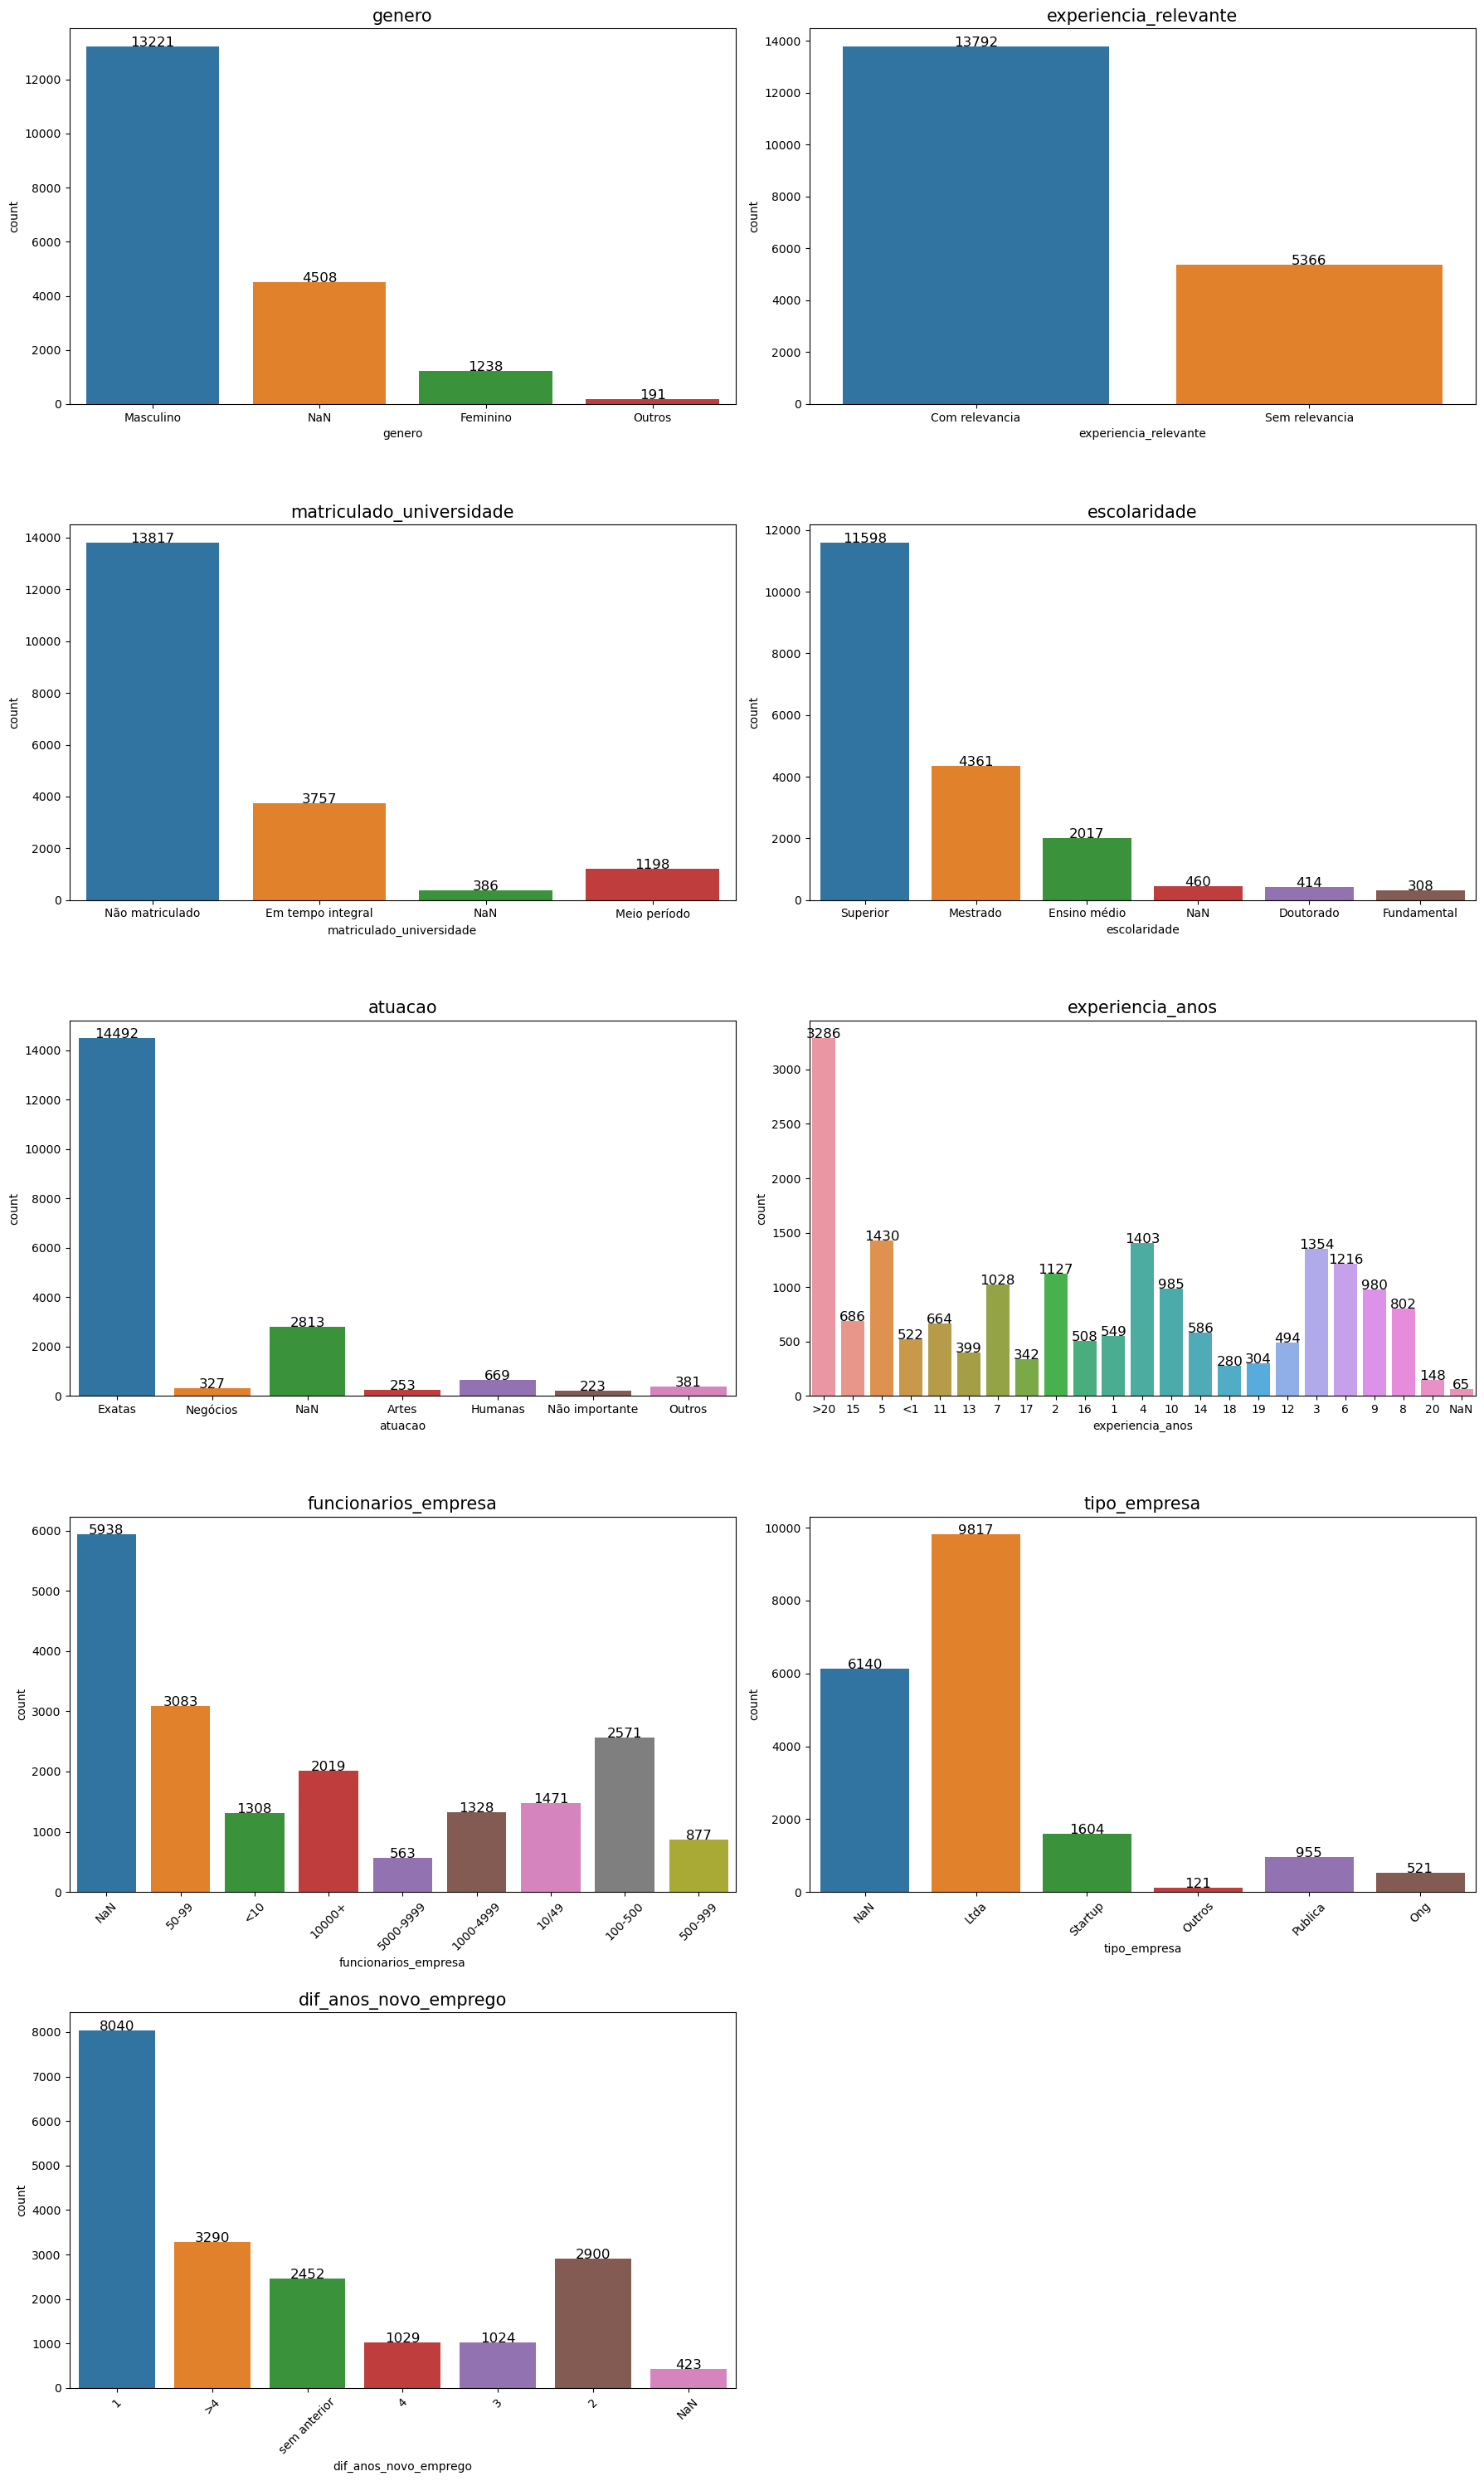

In [16]:
### Gráficos para contagem de registros de colunas categóricas
# tamanho da figura
plt.figure(figsize = (18,30))

# lista de colunas
lista_categorias = df.select_dtypes(include=['object']).drop('cidade', axis=1).columns.tolist()

# Contador
A = 0

# Loop
for i in lista_categorias:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 2)

### Visualizando as variáveis numéricas

#### Tabelas de medidas de resumo

In [17]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['id_candidato', 'procura_emprego'])

,idh_cidade,treinamento_horas
count,19158.000000,19158.000000
mean,0.782057,65.366896
std,0.043168,60.058462
min,0.654000,1.000000
25%,0.769000,23.000000
50%,0.780000,47.000000
75%,0.805000,88.000000
max,0.862000,336.000000


#### Gráficos das distribuições

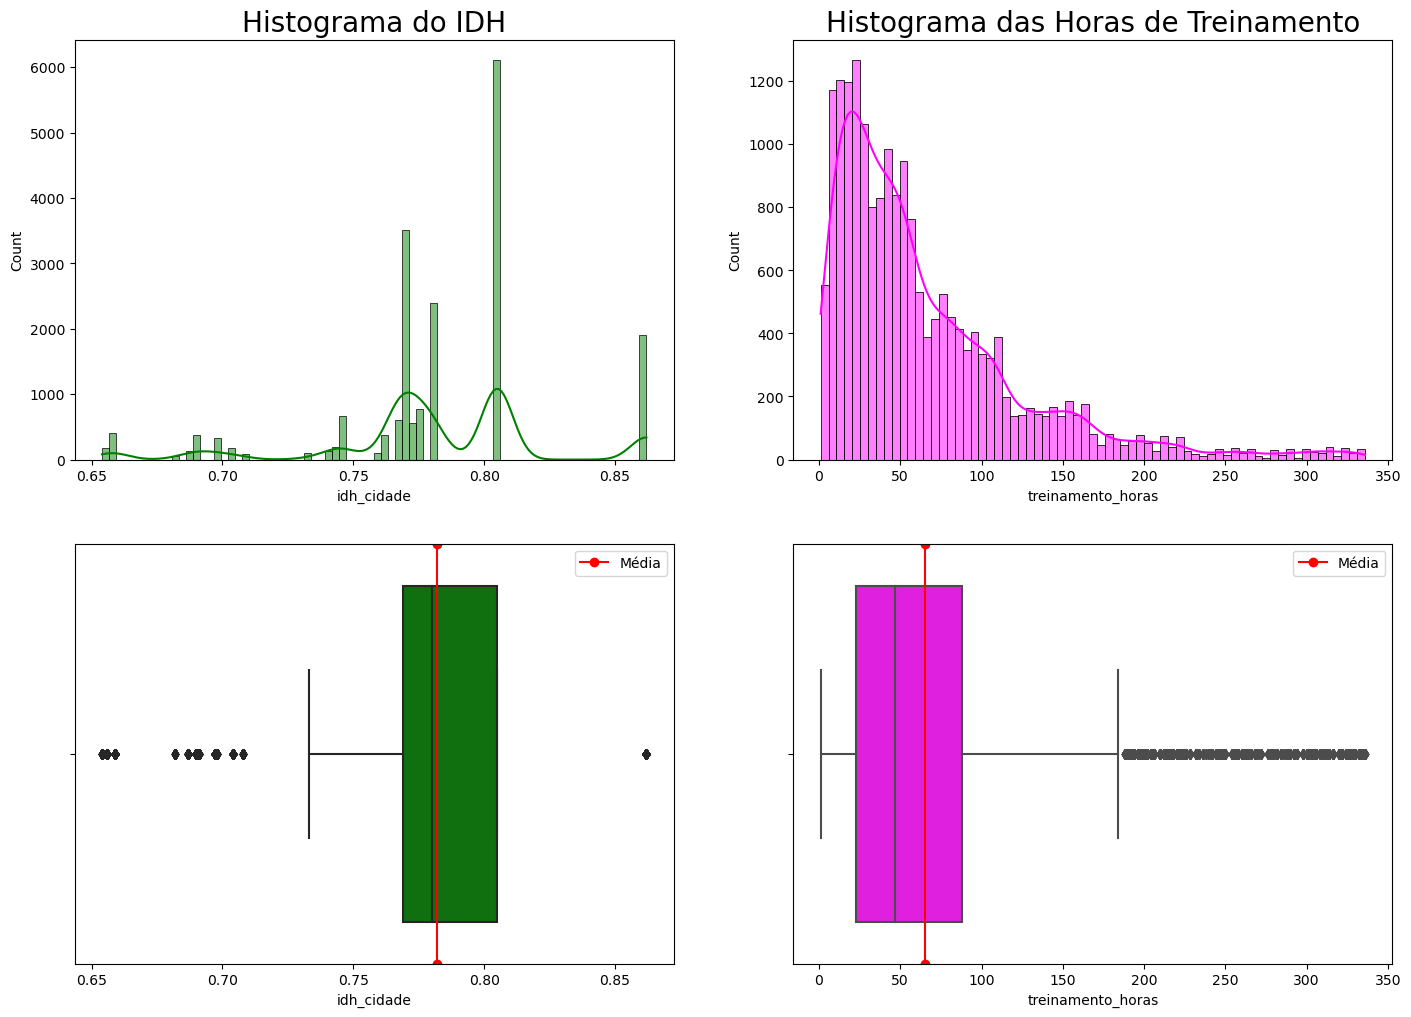

In [18]:
### Graficos para histogramas e boxplots de colunas nummérica
# Figura
plt.figure(figsize = (17,12))

# Subplots com histogramas
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['idh_cidade'], kde = True, color = "green")
plt.title('Histograma do IDH', fontsize = 20)

plt.subplot(222)
sns.histplot(df['treinamento_horas'], kde = True, color = "magenta")
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

# Subplots com boxplots
plt.subplot(223)
sns.boxplot(df['idh_cidade'], color = "green")
media_cdi = df['idh_cidade'].mean()
plt.axvline(media_cdi, marker='o', color='red', label='Média')
plt.legend()

plt.subplot(224)
sns.boxplot(df['treinamento_horas'], color = "magenta")
media_horas = df['treinamento_horas'].mean()
plt.axvline(media_horas, marker='o', color='red', label='Média')
plt.legend()

plt.show()

#### Testando a Normalidade das Distribuições

In [19]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
var_num = ['idh_cidade', 'treinamento_horas']

# Loop
for i in var_num:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar p-valor
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

idh_cidade : Distribuição Não Normal
treinamento_horas : Distribuição Não Normal


### Visualizando os valores ausentes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  int64  
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   atuacao                   16345 non-null  object 
 8   experiencia_anos          19093 non-null  object 
 9   funcionarios_empresa      13220 non-null  object 
 10  tipo_empresa              13018 non-null  object 
 11  dif_anos_novo_emprego     18735 non-null  object 
 12  treinamento_horas         19158 non-null  int64  
 13  procura_emprego           19158 non-null  float64
dtypes: flo

In [21]:
df.isna().sum(axis=0)

id_candidato                   0
cidade                         0
idh_cidade                     0
genero                      4508
experiencia_relevante          0
matriculado_universidade     386
escolaridade                 460
atuacao                     2813
experiencia_anos              65
funcionarios_empresa        5938
tipo_empresa                6140
dif_anos_novo_emprego        423
treinamento_horas              0
procura_emprego                0
dtype: int64

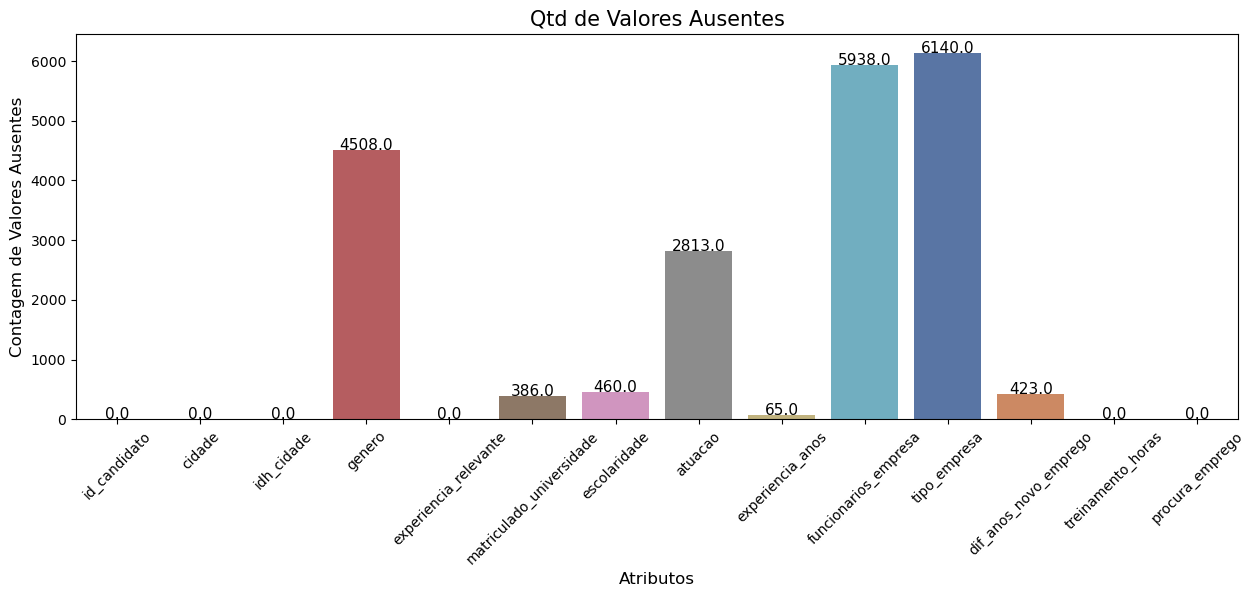

In [22]:
# Valores ausentes por coluna
ausentes_df = df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(ausentes_df['index'], ausentes_df[0], palette = 'deep')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Qtd de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

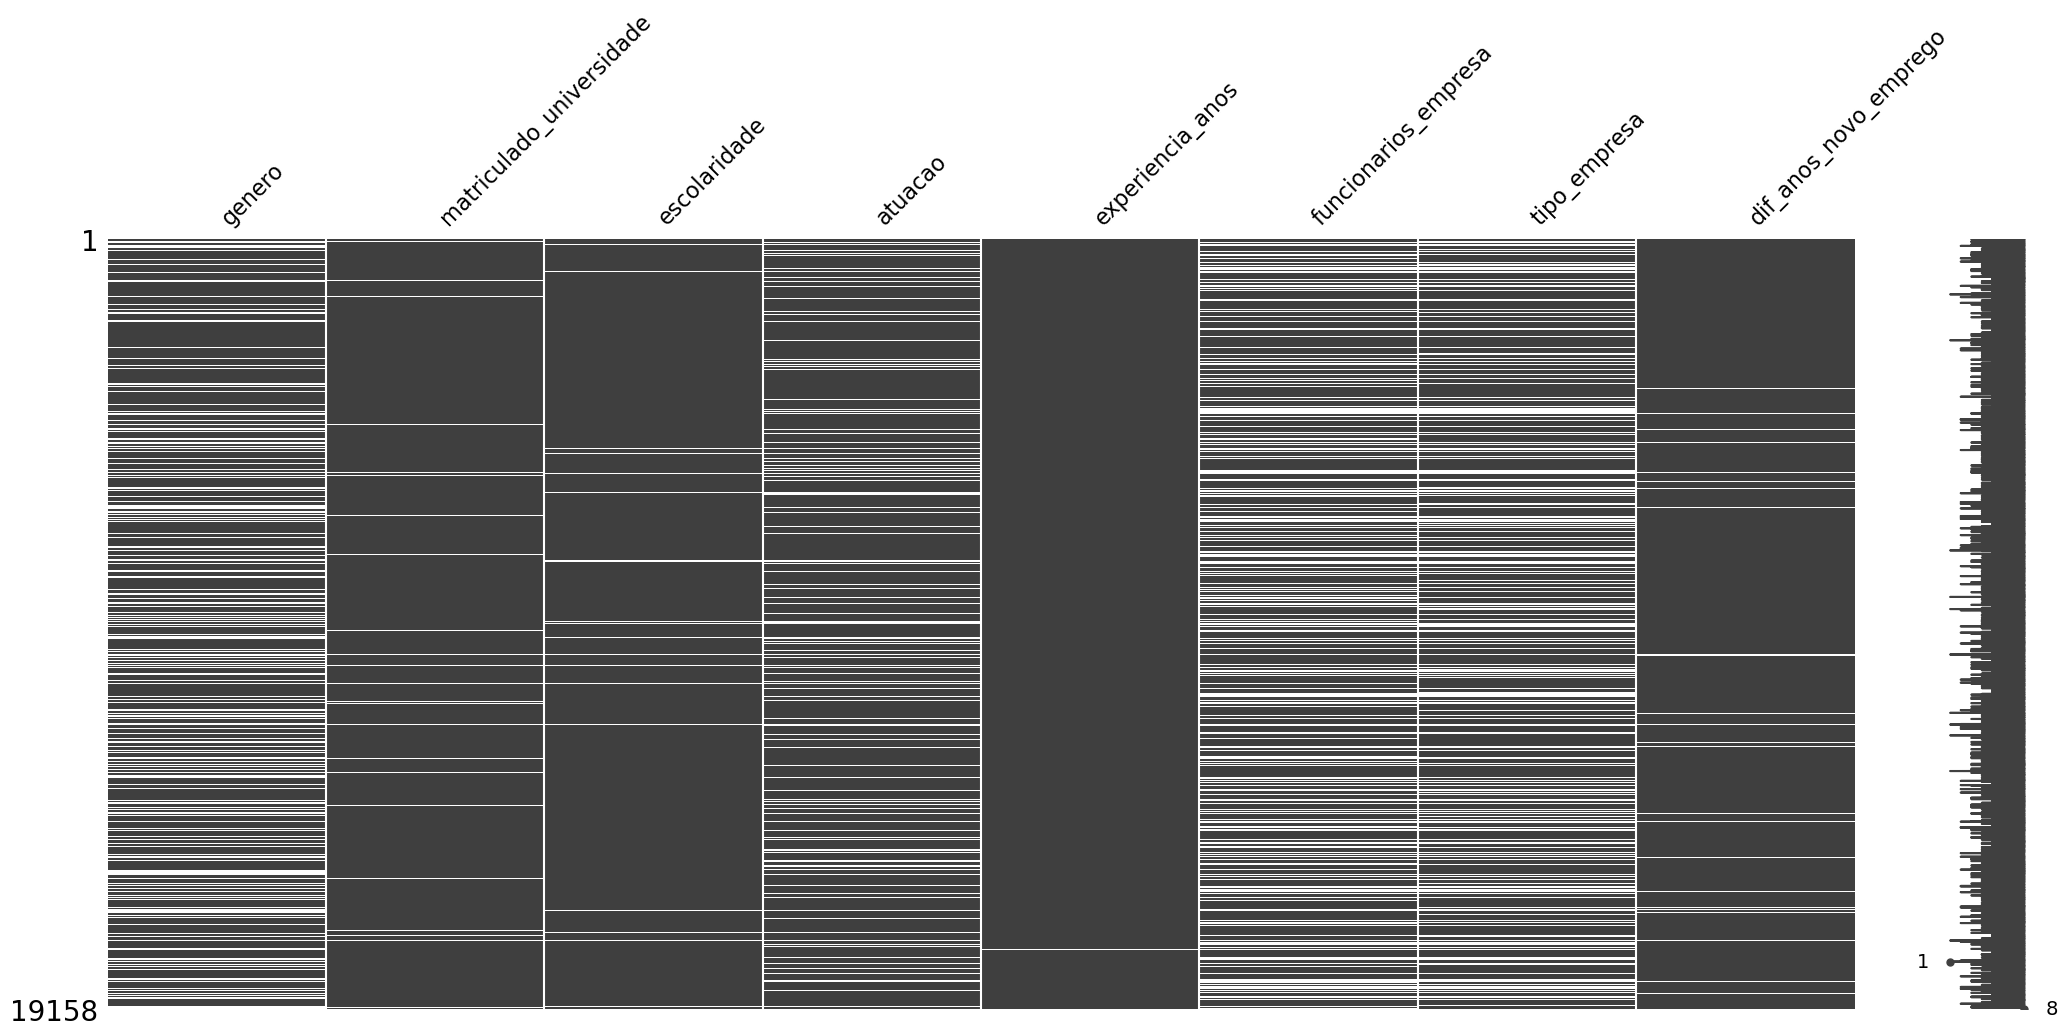

In [23]:
# Gera a visualização

# Dataframe
df_ausentes = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis = None):
    missingno.matrix(df[df_ausentes[df_ausentes[0]>0].index])
    plt.show()

### Verificando as correlações

#### Correlação de Spearman entre variáveis numéricas

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  int64  
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   atuacao                   16345 non-null  object 
 8   experiencia_anos          19093 non-null  object 
 9   funcionarios_empresa      13220 non-null  object 
 10  tipo_empresa              13018 non-null  object 
 11  dif_anos_novo_emprego     18735 non-null  object 
 12  treinamento_horas         19158 non-null  int64  
 13  procura_emprego           19158 non-null  float64
dtypes: flo

In [25]:
# indice de correlação
df.corr('spearman').drop('id_candidato', axis = 1)

,idh_cidade,treinamento_horas,procura_emprego
id_candidato,-0.004828,0.006921,0.049377
idh_cidade,1.000000,0.007347,-0.195831
treinamento_horas,0.007347,1.000000,-0.014126
procura_emprego,-0.195831,-0.014126,1.000000


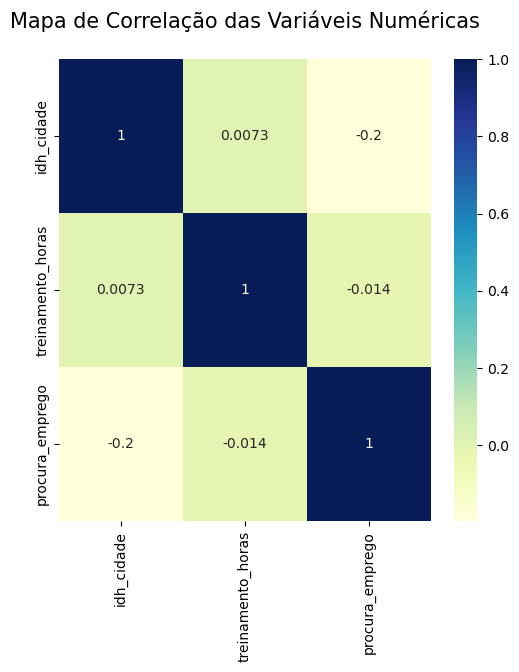

In [26]:
# Heatmap
plt.figure(figsize = (6,6))
sns.heatmap(df.drop('id_candidato', axis = 1).corr('spearman'), annot = True, cmap = 'YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize = 15)
plt.show()

#### Information Value (IV) e peso de evidência entre variáveis categóricas

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  int64  
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   genero                    14650 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   atuacao                   16345 non-null  object 
 8   experiencia_anos          19093 non-null  object 
 9   funcionarios_empresa      13220 non-null  object 
 10  tipo_empresa              13018 non-null  object 
 11  dif_anos_novo_emprego     18735 non-null  object 
 12  treinamento_horas         19158 non-null  int64  
 13  procura_emprego           19158 non-null  float64
dtypes: flo

In [28]:
# Loop
for i in df.drop(columns = ['procura_emprego',
                            'id_candidato',
                            'idh_cidade',
                            'treinamento_horas']).columns:
    
    df_ln_odds_iv = (pd.crosstab(df[i], df['procura_emprego'], normalize = 'columns')
                 .assign(ln_odds = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['ln_odds'] * (dfx[1]-dfx[0]))))
    
    print('Information Value (IV):')
    print(f'{df_ln_odds_iv}\n{"-"*65}\n')

Information Value (IV):
procura_emprego              0.0       1.0   ln_odds        iv
cidade                                                        
Barueri                 0.022182  0.012979 -0.535962  0.608625
Carapicuíba             0.006328  0.007536  0.174755  0.608625
Cotia                   0.022947  0.024074  0.047935  0.608625
Diadema                 0.005632  0.003559 -0.459141  0.608625
Embu das Artes          0.002851  0.001465 -0.665567  0.608625
Francisco Morato        0.003894  0.005024  0.254797  0.608625
Franco da Rocha         0.009248  0.010676  0.143572  0.608625
Guarulhos               0.147417  0.057358 -0.943948  0.608625
Itapecerica da Serra    0.012099  0.016328  0.299749  0.608625
Itapevi                 0.005076  0.006699  0.277372  0.608625
Jandira                 0.010570  0.009420 -0.115123  0.608625
Mairiporã               0.003407  0.013816  1.399930  0.608625
Mauá                    0.011195  0.012979  0.147825  0.608625
Osasco                  0.12057

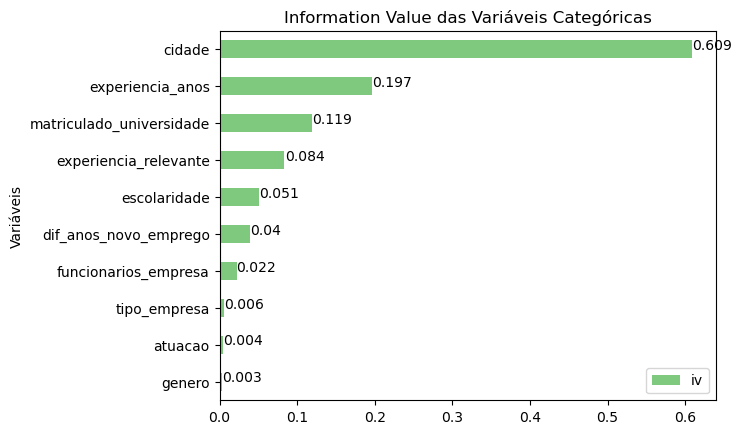

In [29]:
# Plot do Information Value

# Variáveis categóricas
colunas_categ = df.drop(columns = ['procura_emprego',
                                 'id_candidato',
                                 'idh_cidade',
                                 'treinamento_horas']).columns
# Lista para o IV
iv = []

# Loop
for i in colunas_categ:
    df_ln_odds_iv = (pd.crosstab(df[i], df['procura_emprego'], normalize = 'columns')
                 .assign(ln_odds = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['ln_odds']*(dfx[1]-dfx[0]))))
    iv.append(df_ln_odds_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Variáveis':colunas_categ,'iv':iv}).set_index('Variáveis').sort_values(by = 'iv')

# Plot
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")

plt.show()

### Observações relevantes

- Variáveis a serem descartadas:
    - Correlação numérica quase inexistente de acordo Correlação de Sperman:
        - 'treinamento_horas'
    - Baixo poder de separação de acordo o Information Value IV:
        - 'funcionarios_empresa'
        - 'tipo_empresa'
        - 'atuacao'
        - 'genero'
        
 - Próximos passos:
     - Criar novo Dataframe excluindo as variáveis acima
     - Analisar cada variável e recategorizar
     - Tratar valores ausentes
     - Refazer análise exploratória
     - Emitir relatório final

## Tratamento de nova base

### Copiando os dados

In [30]:
df_nova = df.copy().drop(['treinamento_horas', 'tipo_empresa', 'atuacao', 'genero', 'funcionarios_empresa'], axis=1)

In [31]:
df_nova.shape

(19158, 9)

### Recategorizando colunas

In [32]:
# Convertemos a variável 'experiencia_anos' para float
df_nova['experiencia_anos'] = np.where(df_nova['experiencia_anos'] == '<1', 1, df_nova['experiencia_anos'])
df_nova['experiencia_anos'] = np.where(df_nova['experiencia_anos'] == '>20', 21, df_nova['experiencia_anos'])
df_nova['experiencia_anos'] = df_nova['experiencia_anos'].astype(float)

In [33]:
df_nova['experiencia_anos'].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experiencia_anos, dtype: int64

In [34]:
# Convertemos a variável 'dif_anos_novo_emprego' para float
df_nova['dif_anos_novo_emprego'] = np.where(df_nova['dif_anos_novo_emprego'] == 'sem anterior', 0, df_nova['dif_anos_novo_emprego'])
df_nova['dif_anos_novo_emprego'] = np.where(df_nova['dif_anos_novo_emprego'] == '>4', 5, df_nova['dif_anos_novo_emprego'])
df_nova['dif_anos_novo_emprego'] = df_nova['dif_anos_novo_emprego'].astype(float)

In [35]:
df_nova['dif_anos_novo_emprego'].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: dif_anos_novo_emprego, dtype: int64

In [36]:
# Convertemos a variável 'id_candidato' para object
df_nova['id_candidato'] = df_nova['id_candidato'].astype(object)

In [37]:
# criar uma coluna com faixa de idh
def categorize_idh(idh):
    if idh >= 0.85 and idh <= 0.9:
        return '0.85 a 0.90'
    elif idh >= 0.8 and idh < 0.85:
        return '0.80 a 0.85'
    elif idh >= 0.75 and idh < 0.8:
        return '0.75 a 0.80'
    elif idh >= 0.7 and idh < 0.75:
        return '0.70 a 0.75'
    elif idh >= 0.65 and idh < 0.7:
        return '0.65 a 0.70'
    elif idh >= 0.6 and idh < 0.65:
        return '0.60 a 0.65'
    else:
        return 'Sem categoria'

# aplicar a função a cada linha do dataframe para criar a nova coluna categórica
df_nova['faixa_idh'] = df_nova['idh_cidade'].apply(categorize_idh)

In [38]:
# reorganizar as colunas, colocando 'faixa_idh' depois de 'idh_cidade'
df_nova = df_nova.reindex(columns=['id_candidato', 'cidade', 'idh_cidade', 'faixa_idh',
                                  'experiencia_relevante', 'matriculado_universidade',
                                  'escolaridade', 'dif_anos_novo_emprego', 
                                  'experiencia_anos', 'procura_emprego'])

In [39]:
df_nova.head()

,id_candidato,cidade,idh_cidade,faixa_idh,experiencia_relevante,matriculado_universidade,escolaridade,dif_anos_novo_emprego,experiencia_anos,procura_emprego
0,8949,São Paulo,0.805,0.80 a 0.85,Com relevancia,Não matriculado,Superior,1.0,21.0,1.0
1,29725,Diadema,0.758,0.75 a 0.80,Sem relevancia,Não matriculado,Superior,5.0,15.0,0.0
2,11561,Osasco,0.769,0.75 a 0.80,Sem relevancia,Em tempo integral,Superior,0.0,5.0,0.0
3,33241,Barueri,0.763,0.75 a 0.80,Sem relevancia,NaN,Superior,0.0,1.0,1.0
4,666,Mauá,0.747,0.70 a 0.75,Com relevancia,Não matriculado,Mestrado,4.0,21.0,0.0


In [40]:
df_nova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              19158 non-null  object 
 1   cidade                    19158 non-null  object 
 2   idh_cidade                19158 non-null  float64
 3   faixa_idh                 19158 non-null  object 
 4   experiencia_relevante     19158 non-null  object 
 5   matriculado_universidade  18772 non-null  object 
 6   escolaridade              18698 non-null  object 
 7   dif_anos_novo_emprego     18735 non-null  float64
 8   experiencia_anos          19093 non-null  float64
 9   procura_emprego           19158 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.5+ MB


### Tratar valores ausentes

#### Visualizar valores ausentes

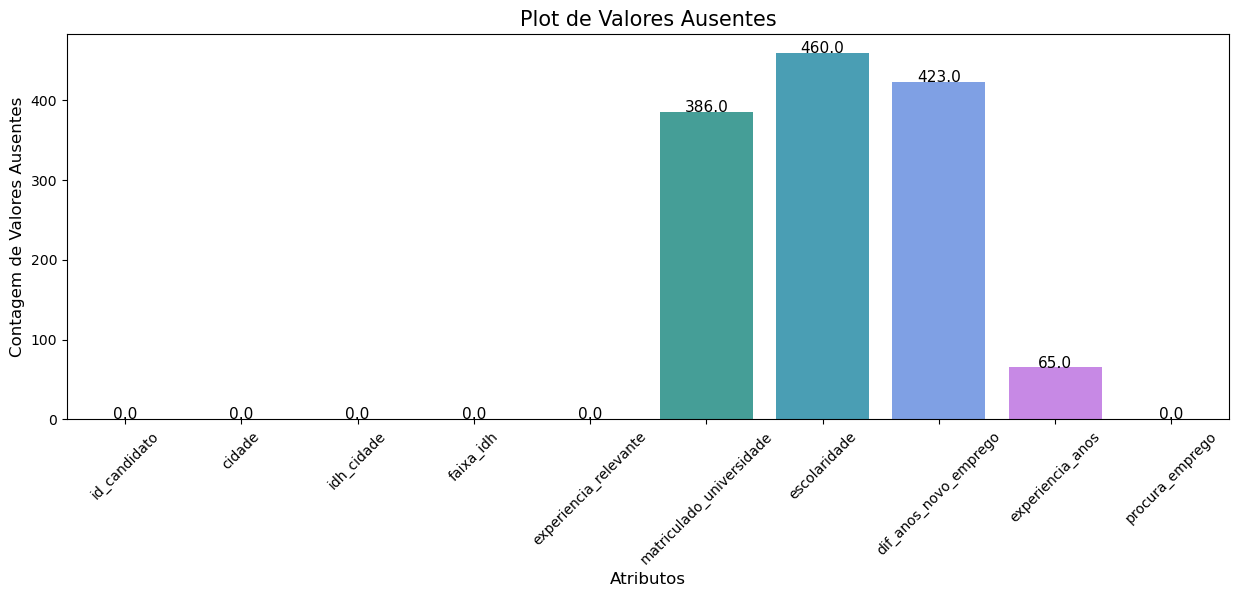

In [41]:
# Valores ausentes por coluna
ausentes_df = df_nova.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(ausentes_df['index'], ausentes_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

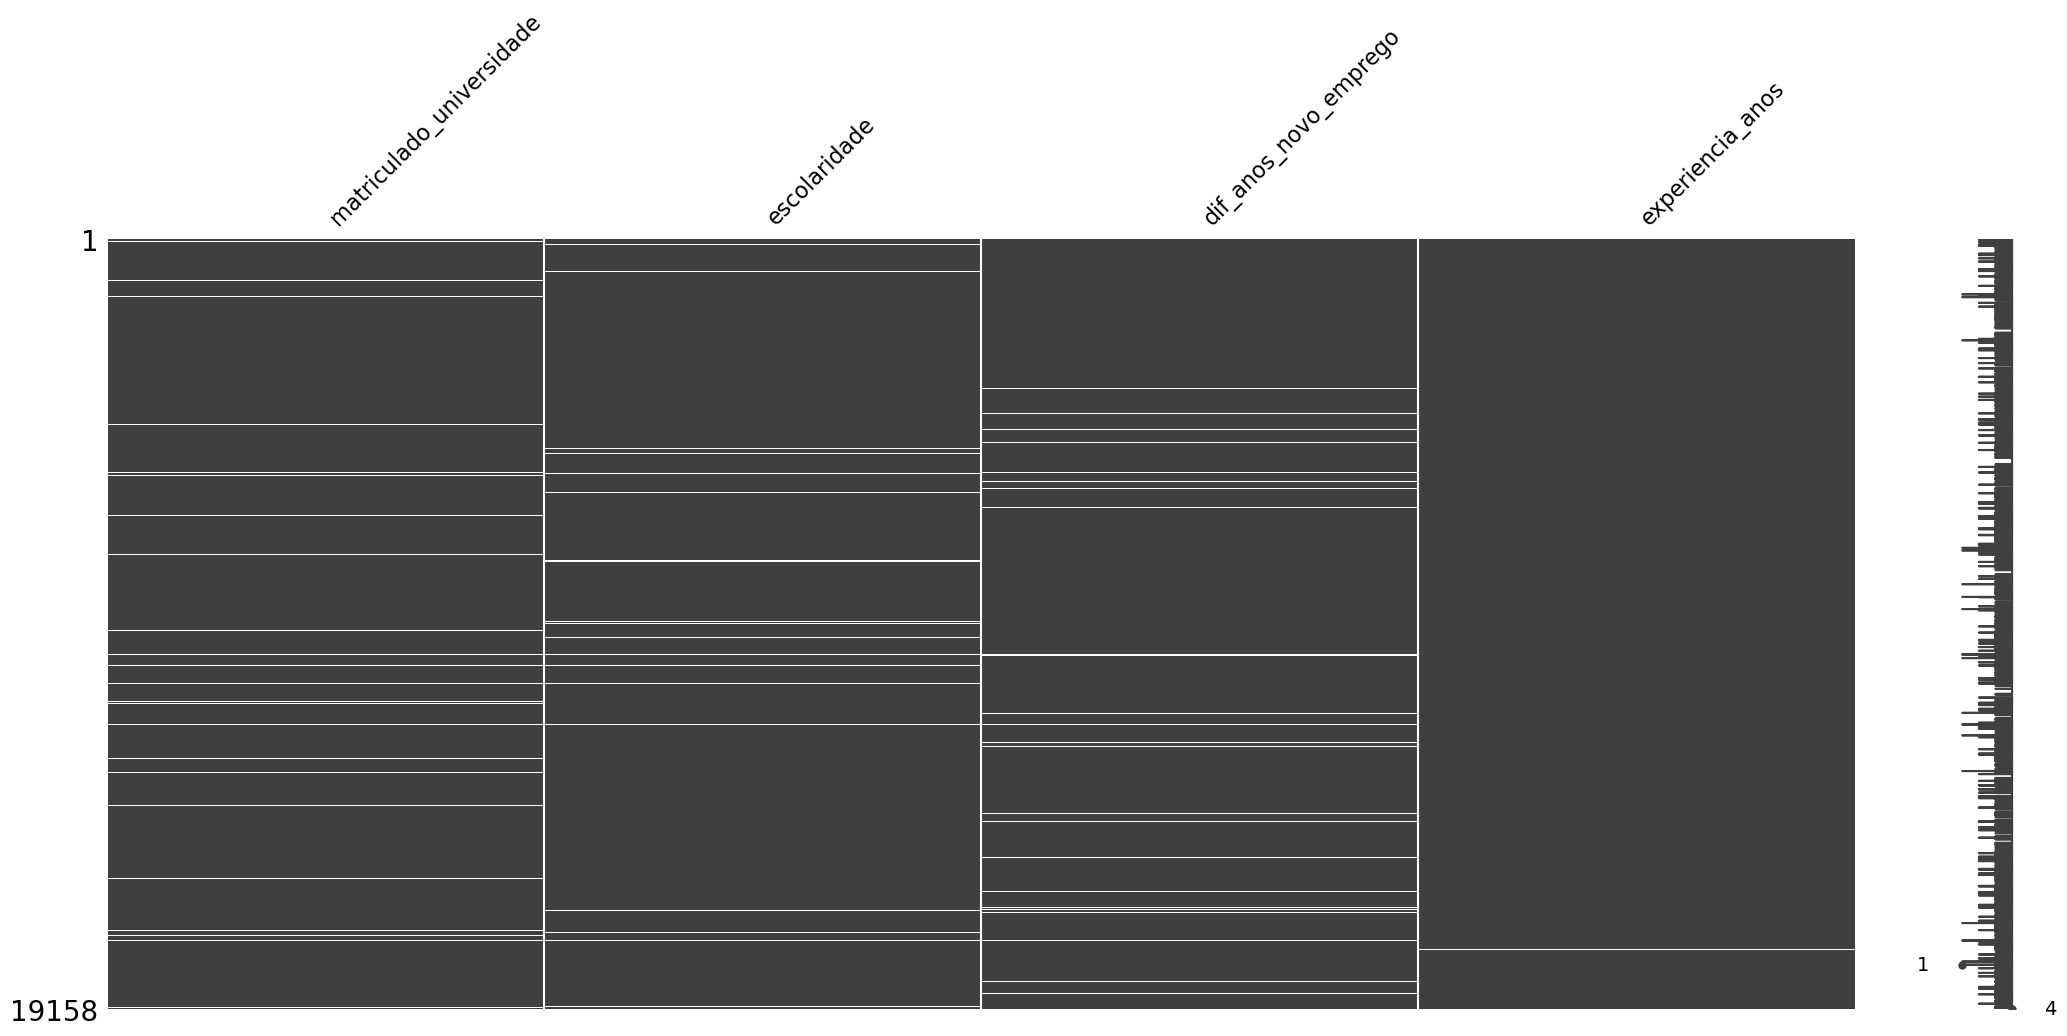

In [42]:
# Gera a visualização

# Dataframe
df_ausentes = pd.DataFrame(df_nova.isna().sum())

# Plot - Mapa de Valores Ausentes
if df_nova.isna().any(axis = None):
    missingno.matrix(df_nova[df_ausentes[df_ausentes[0]>0].index])
    plt.show()

In [43]:
df_nova.isna().sum()

id_candidato                  0
cidade                        0
idh_cidade                    0
faixa_idh                     0
experiencia_relevante         0
matriculado_universidade    386
escolaridade                460
dif_anos_novo_emprego       423
experiencia_anos             65
procura_emprego               0
dtype: int64

In [44]:
round((df_nova.isna().sum() / len(df)) * 100,1)

id_candidato                0.0
cidade                      0.0
idh_cidade                  0.0
faixa_idh                   0.0
experiencia_relevante       0.0
matriculado_universidade    2.0
escolaridade                2.4
dif_anos_novo_emprego       2.2
experiencia_anos            0.3
procura_emprego             0.0
dtype: float64

In [45]:
# descobrir quantos registro nulos da variavel matriculado_universidade estão com informações na 
# variável escolaridade
print('\nTotal de Valores Ausentes na Variável matriculado_universidade:', df_nova['matriculado_universidade'].isna().sum())
print('\nProporção de Valores Ausentes na Variável escolaridade:')
df_nova[df_nova['matriculado_universidade'].isna()]['escolaridade'].value_counts(dropna = False)


Total de Valores Ausentes na Variável matriculado_universidade: 386

Proporção de Valores Ausentes na Variável escolaridade:


Superior        171
NaN             100
Mestrado         53
Ensino médio     47
Fundamental       9
Doutorado         6
Name: escolaridade, dtype: int64

#### Tratar valores ausentes em um novo dataframe

- Atividades a serem executadas
    - Preencher os campos nulos da variável 'matriculado_universidade' como "Não matriculado" onde na variável 'escolaridade' os campos estiverem preenchidos como "Ensino médio" ou "Fundamental".
    - Demais campos nulos da variável 'matriculado_universidade' preencher como "Outros".
    - Preencher os campos nulos da variável 'escolaridade' como "Outros".
    - Excluir registros com campos nulos as váriáveis 'dif_anos_novo_emprego' e 'experiencia_anos'.
    

In [46]:
# criar novo dataframe
df_limpa = df_nova.copy()

In [47]:
# Prepara o índice
novo_indice = (df_limpa[(df_limpa['matriculado_universidade'].isna()) & ((df_limpa['escolaridade']=='Ensino médio') | (df_limpa['escolaridade']=='Fundamental'))]).index

In [48]:
len(novo_indice)

56

In [49]:
df_limpa['matriculado_universidade'][novo_indice] = 'Não matriculado'

In [50]:
round((df_limpa.isna().sum() / len(df)) * 100,1)

id_candidato                0.0
cidade                      0.0
idh_cidade                  0.0
faixa_idh                   0.0
experiencia_relevante       0.0
matriculado_universidade    1.7
escolaridade                2.4
dif_anos_novo_emprego       2.2
experiencia_anos            0.3
procura_emprego             0.0
dtype: float64

In [51]:
df_limpa.isna().sum()

id_candidato                  0
cidade                        0
idh_cidade                    0
faixa_idh                     0
experiencia_relevante         0
matriculado_universidade    330
escolaridade                460
dif_anos_novo_emprego       423
experiencia_anos             65
procura_emprego               0
dtype: int64

In [52]:
# imputar 'outros' em campos vazios da variável 'matriculado_universidade'
df_limpa['matriculado_universidade'] = df_limpa['matriculado_universidade'].fillna('Outros')

In [53]:
# imputar 'outros' em campos vazios da variável 'escolaridade'
df_limpa['escolaridade'] = df_limpa['escolaridade'].fillna('Outros')

In [54]:
# excluir registros com campos vazios da variável 'dif_anos_novo_emprego'
df_limpa = df_limpa.dropna(subset=['dif_anos_novo_emprego'])

In [55]:
# excluir registros com campos vazios da variável 'experiencia_anos'
df_limpa = df_limpa.dropna(subset=['experiencia_anos'])

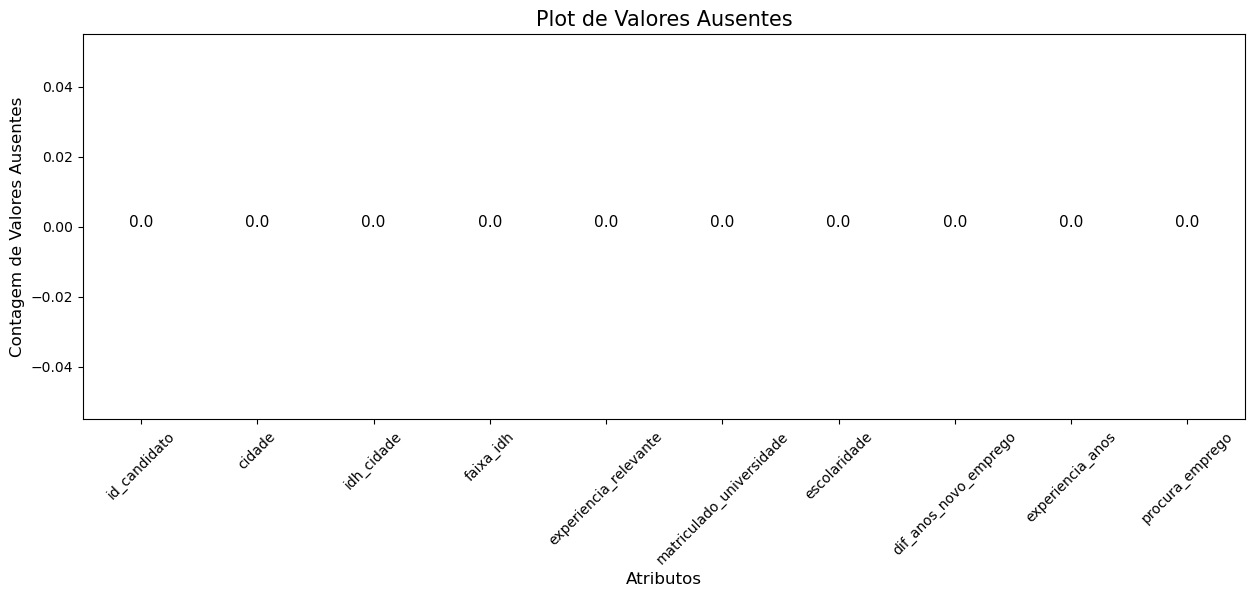

In [56]:
# Valores ausentes por coluna
ausentes_df = df_limpa.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,5))

# Barplot
ax = sns.barplot(ausentes_df['index'], ausentes_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

## Análise exploratória de dados limpos

In [57]:
df_limpa.shape

(18694, 10)

In [58]:
df_limpa.head()

,id_candidato,cidade,idh_cidade,faixa_idh,experiencia_relevante,matriculado_universidade,escolaridade,dif_anos_novo_emprego,experiencia_anos,procura_emprego
0,8949,São Paulo,0.805,0.80 a 0.85,Com relevancia,Não matriculado,Superior,1.0,21.0,1.0
1,29725,Diadema,0.758,0.75 a 0.80,Sem relevancia,Não matriculado,Superior,5.0,15.0,0.0
2,11561,Osasco,0.769,0.75 a 0.80,Sem relevancia,Em tempo integral,Superior,0.0,5.0,0.0
3,33241,Barueri,0.763,0.75 a 0.80,Sem relevancia,Outros,Superior,0.0,1.0,1.0
4,666,Mauá,0.747,0.70 a 0.75,Com relevancia,Não matriculado,Mestrado,4.0,21.0,0.0


In [59]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              18694 non-null  object 
 1   cidade                    18694 non-null  object 
 2   idh_cidade                18694 non-null  float64
 3   faixa_idh                 18694 non-null  object 
 4   experiencia_relevante     18694 non-null  object 
 5   matriculado_universidade  18694 non-null  object 
 6   escolaridade              18694 non-null  object 
 7   dif_anos_novo_emprego     18694 non-null  float64
 8   experiencia_anos          18694 non-null  float64
 9   procura_emprego           18694 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


### Visualizando as variáveis categóricas dos dados limpos

#### Tabelas de frequência dos dados limpos

In [60]:
# iterando sobre as colunas categóricas do dataframe
for coluna in df_limpa.columns.drop(['id_candidato',
                                     'idh_cidade',
                                     'dif_anos_novo_emprego',
                                     'experiencia_anos',
                                     'procura_emprego']):
    # criando a tabela de frequência para a coluna atual
    freq_table = pd.DataFrame({'Freq. Absoluta': df_limpa[coluna].value_counts(dropna=False).fillna('NA'),
                               'Freq. Relativa': (df_limpa[coluna].value_counts(normalize=True, dropna=False) * 100).fillna('NA').round(1),
                               'Freq. Acumulada': (df_limpa[coluna].value_counts(normalize=True, dropna=False).cumsum() * 100).fillna('NA').round(1)})
    
    # imprimindo a tabela de frequência
    print(f'Tabela de Frequência - variável: {coluna}\n{"-"*70}\n{freq_table}\n{"-"*70}\n\n')



Tabela de Frequência - variável: cidade
----------------------------------------------------------------------
                        Freq. Absoluta  Freq. Relativa  Freq. Acumulada
São Paulo                         6017            32.2             32.2
Osasco                            3365            18.0             50.2
Guarulhos                         2353            12.6             62.8
São Caetano do Sul                1877            10.0             72.8
São Bernardo do Campo              759             4.1             76.9
Taboão da Serra                    595             3.2             80.1
Santo André                        557             3.0             83.0
Cotia                              440             2.4             85.4
Santa Isabel                       388             2.1             87.5
Barueri                            371             2.0             89.5
Suzano                             256             1.4             90.8
Itapecerica da Serra     

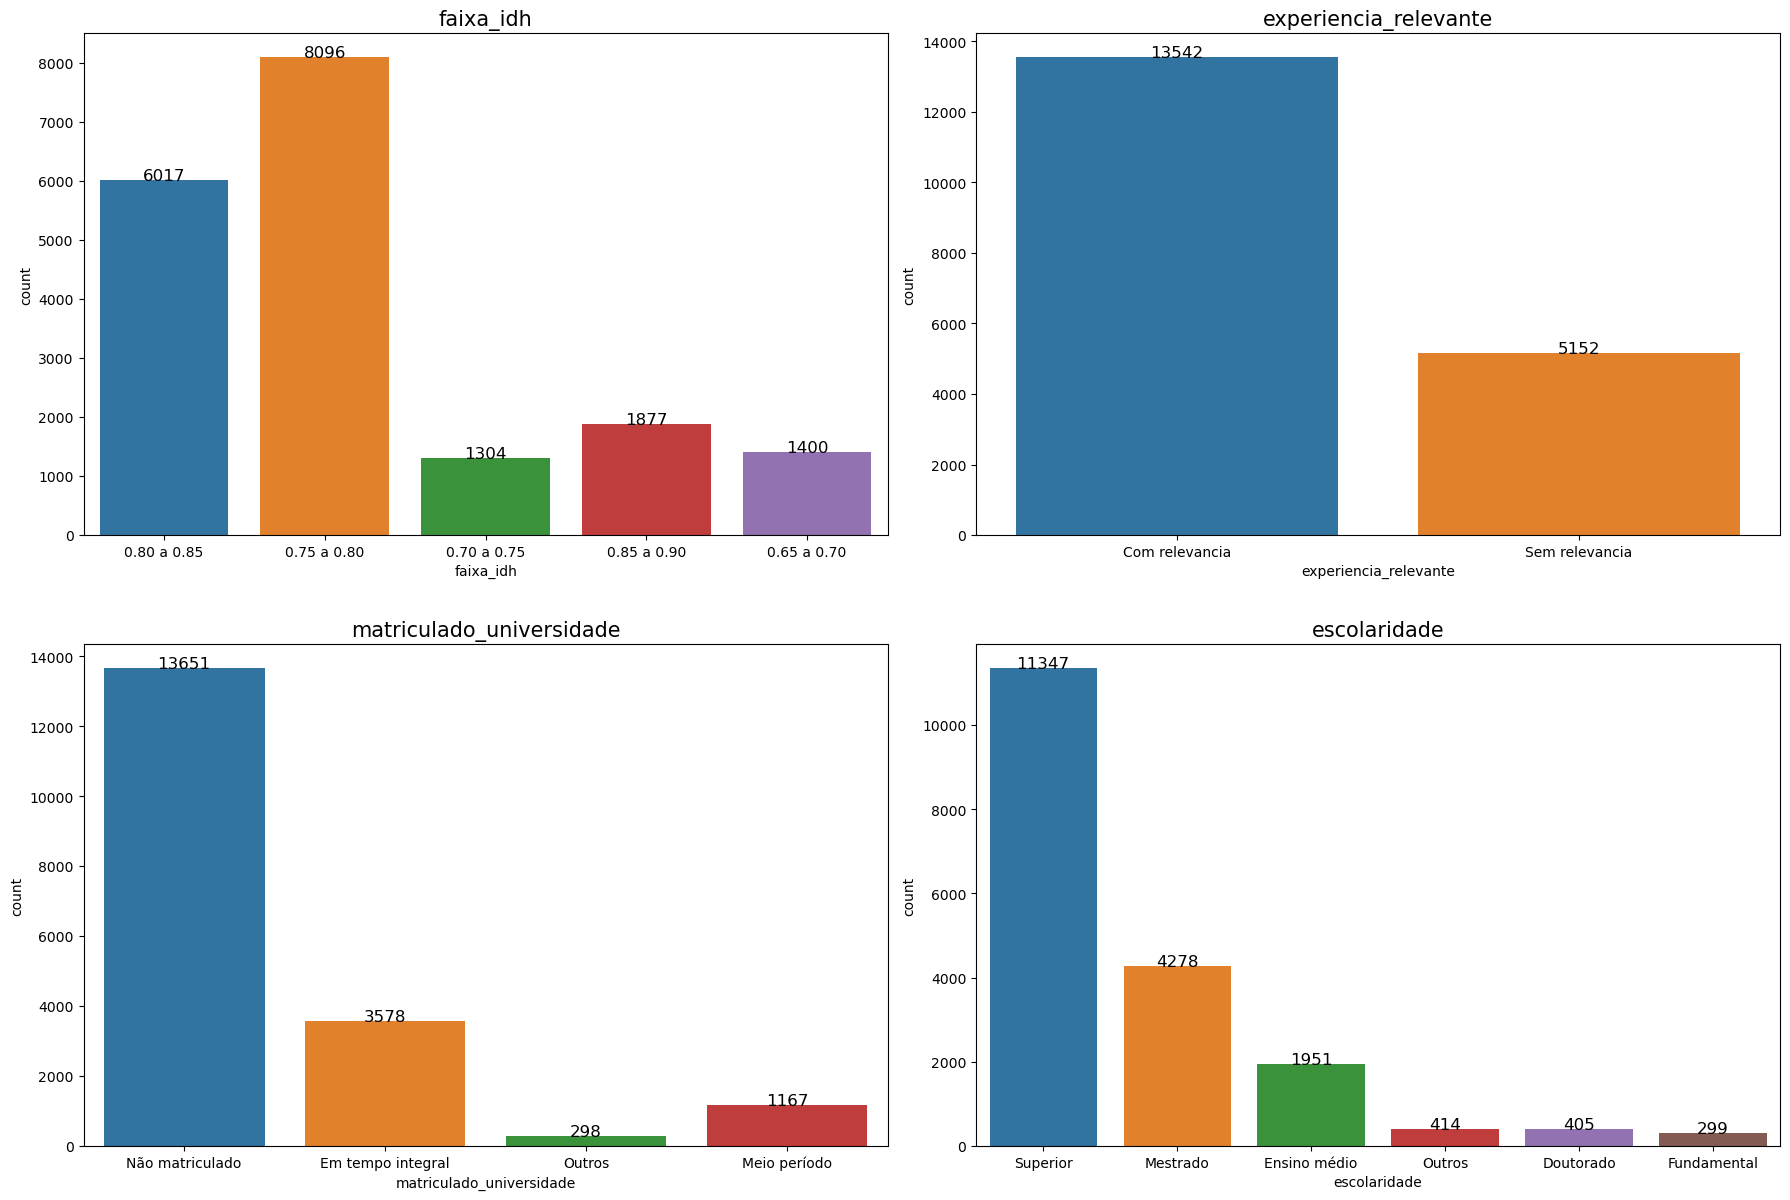

In [61]:
### Graficos para contagem de registros de colunas categóricas
# tamanho da figura
plt.figure(figsize = (18,30))

# Lista de colunas

# lista de colunas
lista_categorias = df_limpa.select_dtypes(include=['object']).drop('cidade', axis=1).drop('id_candidato', axis=1).columns.tolist()

# Contador
A = 0

# Loop
for i in lista_categorias:
    A += 1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df_limpa.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)

# Layout
plt.tight_layout(h_pad = 3)

### Visualizando as variáveis numéricas dados limpos

#### Tabelas de medidas de resumo dados limpos

In [62]:
# Descrevendo os dados numéricos
df_limpa.describe(include=float).drop('procura_emprego', axis=1)

,idh_cidade,dif_anos_novo_emprego,experiencia_anos
count,18694.000000,18694.000000,18694.000000
mean,0.782343,2.001123,10.206269
std,0.043083,1.675502,6.730638
min,0.654000,0.000000,1.000000
25%,0.769000,1.000000,4.000000
50%,0.780000,1.000000,9.000000
75%,0.805000,3.000000,16.000000
max,0.862000,5.000000,21.000000


#### Gráficos de distribuições dados limpos

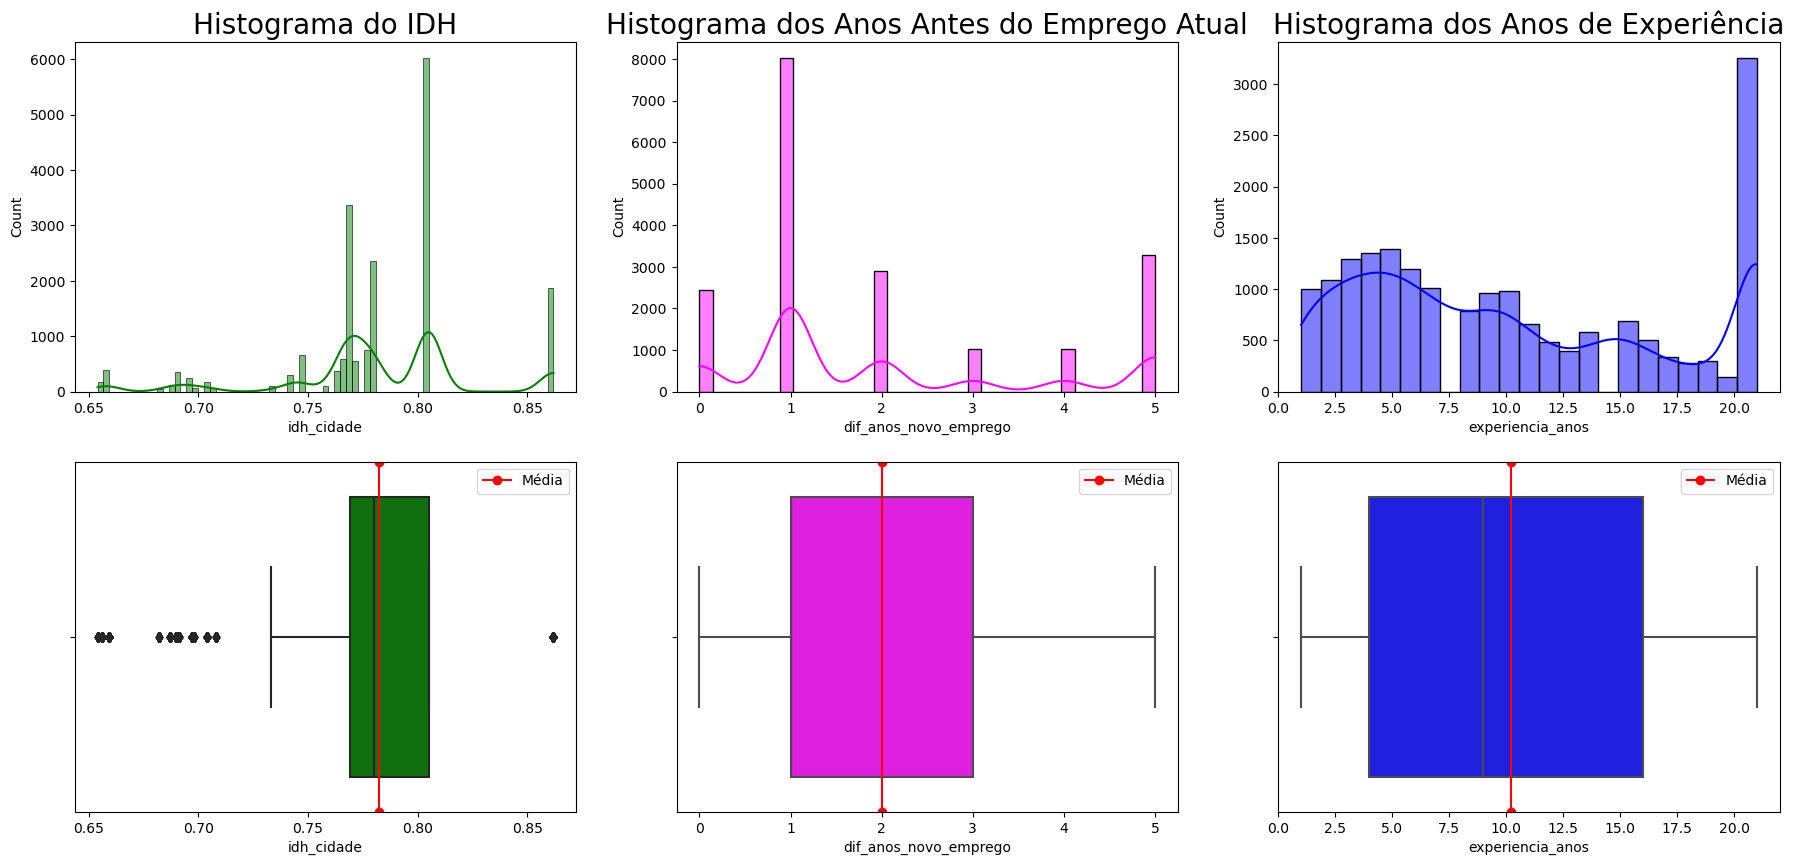

In [63]:
### Graficos para histogramas e boxplots de colunas nummérica
# Figura
plt.figure(figsize = (22,10))

# Subplots com histogramas
plt.subplot(231)
sns.color_palette("hls", 8)
sns.histplot(df_limpa['idh_cidade'], kde = True, color = "green")
plt.title('Histograma do IDH', fontsize = 20)

plt.subplot(232)
sns.histplot(df_limpa['dif_anos_novo_emprego'], kde = True, color = "magenta")
plt.title('Histograma dos Anos Antes do Emprego Atual', fontsize = 20)

plt.subplot(233)
sns.histplot(df_limpa['experiencia_anos'], kde = True, color = "blue")
plt.title('Histograma dos Anos de Experiência', fontsize = 20)

# Subplots com boxplots
plt.subplot(234)
sns.boxplot(df_limpa['idh_cidade'], color = "green")
media_cdi = df_limpa['idh_cidade'].mean()
plt.axvline(media_cdi, marker='o', color='red', label='Média')
plt.legend()

plt.subplot(235)
sns.boxplot(df_limpa['dif_anos_novo_emprego'], color = "magenta")
media_horas = df_limpa['dif_anos_novo_emprego'].mean()
plt.axvline(media_horas, marker='o', color='red', label='Média')
plt.legend()

plt.subplot(236)
sns.boxplot(df_limpa['experiencia_anos'], color = "blue")
media_horas = df_limpa['experiencia_anos'].mean()
plt.axvline(media_horas, marker='o', color='red', label='Média')
plt.legend()

plt.show()

### Verificando as correlações dados limpos

#### Correlação de Spearman entre variáveis numéricas dados limpos

In [64]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              18694 non-null  object 
 1   cidade                    18694 non-null  object 
 2   idh_cidade                18694 non-null  float64
 3   faixa_idh                 18694 non-null  object 
 4   experiencia_relevante     18694 non-null  object 
 5   matriculado_universidade  18694 non-null  object 
 6   escolaridade              18694 non-null  object 
 7   dif_anos_novo_emprego     18694 non-null  float64
 8   experiencia_anos          18694 non-null  float64
 9   procura_emprego           18694 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


In [65]:
# indice de correlação
df_limpa.corr('spearman')

,idh_cidade,dif_anos_novo_emprego,experiencia_anos,procura_emprego
idh_cidade,1.000000,0.162655,0.250742,-0.192905
dif_anos_novo_emprego,0.162655,1.000000,0.473284,-0.082708
experiencia_anos,0.250742,0.473284,1.000000,-0.179469
procura_emprego,-0.192905,-0.082708,-0.179469,1.000000


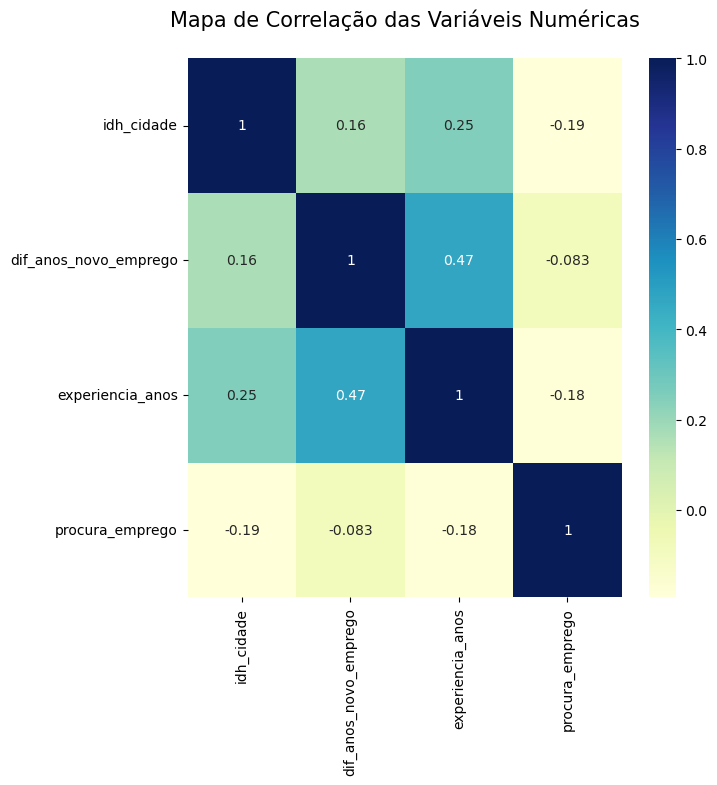

In [66]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df_limpa.corr('spearman'), annot = True, cmap = 'YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize = 15)
plt.show()

In [67]:
df_limpa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18694 entries, 0 to 19157
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_candidato              18694 non-null  object 
 1   cidade                    18694 non-null  object 
 2   idh_cidade                18694 non-null  float64
 3   faixa_idh                 18694 non-null  object 
 4   experiencia_relevante     18694 non-null  object 
 5   matriculado_universidade  18694 non-null  object 
 6   escolaridade              18694 non-null  object 
 7   dif_anos_novo_emprego     18694 non-null  float64
 8   experiencia_anos          18694 non-null  float64
 9   procura_emprego           18694 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.6+ MB


#### Information Value (IV) e peso de evidência entre variáveis categóricas dados limpos

In [68]:
# Loop
for i in df_limpa.drop(columns = ['id_candidato',
                                  'idh_cidade',
                                  'dif_anos_novo_emprego',
                                  'experiencia_anos',
                                  'procura_emprego']).columns:
    
    df_ln_odds_iv = (pd.crosstab(df_limpa[i], df_limpa['procura_emprego'], normalize = 'columns')
                 .assign(ln_odds = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['ln_odds'] * (dfx[1]-dfx[0]))))
    
    print('Information Value (IV):')
    print(f'{df_ln_odds_iv}\n{"-"*65}\n')

Information Value (IV):
procura_emprego              0.0       1.0   ln_odds        iv
cidade                                                        
Barueri                 0.021935  0.013458 -0.488531  0.604686
Carapicuíba             0.006034  0.006946  0.140760  0.604686
Cotia                   0.023142  0.024745  0.066977  0.604686
Diadema                 0.005679  0.003473 -0.491762  0.604686
Embu das Artes          0.002910  0.001519 -0.649986  0.604686
Francisco Morato        0.003336  0.004992  0.403022  0.604686
Franco da Rocha         0.009228  0.010202  0.100289  0.604686
Guarulhos               0.148080  0.057955 -0.938079  0.604686
Itapecerica da Serra    0.011997  0.015194  0.236272  0.604686
Itapevi                 0.005111  0.006729  0.274997  0.604686
Jandira                 0.010222  0.008248 -0.214552  0.604686
Mairiporã               0.003478  0.014109  1.400242  0.604686
Mauá                    0.011003  0.013024  0.168595  0.604686
Osasco                  0.11890

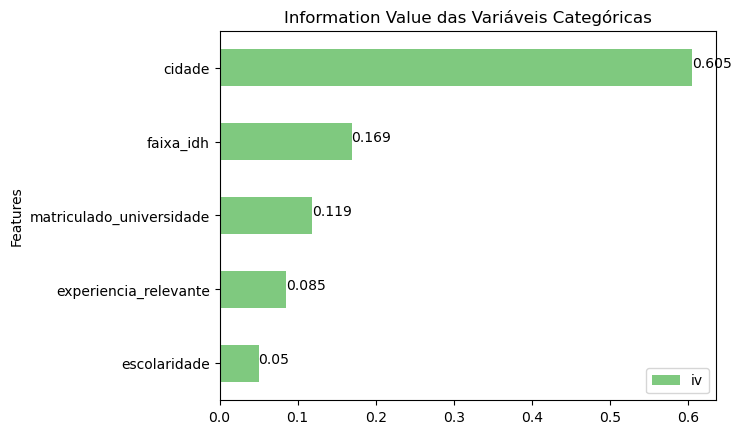

In [69]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df_limpa.drop(columns = ['id_candidato',
                                  'idh_cidade',
                                  'dif_anos_novo_emprego',
                                  'experiencia_anos',
                                  'procura_emprego']).columns
# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_ln_odds_iv = (pd.crosstab(df_limpa[i], df_limpa['procura_emprego'], normalize = 'columns')
                 .assign(ln_odds = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['ln_odds']*(dfx[1]-dfx[0]))))
    iv.append(df_ln_odds_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
#plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")

plt.show()

## Resultado das Análises

- Apenas 25% dos alunos que participaram dos treinamentos estavam dispostos a trocar de emprego e, analisando os dados de forma ampla, podemos afirmar estatisticamente que as variáveis que mais influenciaram nas respostas foram:
    - Experiência elevada supõe que o candidato tem um emprego estável de boa remuneração e benefícios, portanto, não estão dispostos a trocar de emprego.
    - Cidades de baixo IDH residem a maioria dos candidatos que reponderam sim para a troca de emprego. Fazemos uma reflexão que alunos de cidades de IDH alto já possuem empregos estáveis e de boa remuneração e benefícios.
    - Poucas mulheres usufruiram dos treinamentos, porém, o gênero pouco explica a resposta por trocar ou não de emprego.
- Recomendamos ao RH:
    - Focar os treinamentos em cidades de IDH menores.
    - Pesquisar a respeito de salários e benefícios de empresas que os colaboradores responderam não, com a finalidade de entender e talvez desenvolver uma nova política de remuneração.
    - Entender melhor as demandas do público feminino para desenvolvimento de uma política de inclusão.

## Fim